# SI 618 Day 10: Clustering

Version 2023.11.02.1.CT

## A few words about pipelines

Consider the following pipeline:

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS

pipe = Pipeline([
    ('scale',StandardScaler()), # First, you need a human-readable name(single word, no sp chars). Then,
    ('pca', PCA(n_components=5,random_state=42)),
])

The pipeline can be queried by using `get_params()`:

In [ ]:
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('pca', PCA(n_components=5, random_state=42))],
 'verbose': False,
 'scale': StandardScaler(),
 'pca': PCA(n_components=5, random_state=42),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 5,
 'pca__n_oversamples': 10,
 'pca__power_iteration_normalizer': 'auto',
 'pca__random_state': 42,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False}

The `named_steps` attribute holds (unsurprisingly) the named steps of the pipeline:

In [ ]:
pipe.named_steps # Key is string, values are attributes.

{'scale': StandardScaler(), 'pca': PCA(n_components=5, random_state=42)}

The steps themselves can be accessed as attributes of the `named_steps` property:

In [ ]:
pipe.named_steps.pca

PCA(n_components=5, random_state=42)

And specifics about the step can be modified by assigning new values to them:

In [ ]:
pipe.named_steps.pca.n_components=3

In [ ]:
pipe.named_steps.pca

PCA(n_components=3, random_state=42)

And you can also use the <estimator>__<parameter> syntax:


In [ ]:
pipe.set_params(pca__n_components=2)

Pipeline(steps=[('scale', StandardScaler()),
                ('pca', PCA(n_components=2, random_state=42))])

Ok, on to today's notebook, which consists of two tasks.  First, let's load the music data we generated in an earlier class:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# let's use these imports to make life easier

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQsv4JEDxRBx_V3XOsEIKrZfhbv0syYTPv3swxG8UlW7Beu2aYBlDtMfRcPOuqYKkAkvlvNppMpzd8A/pub?gid=0&single=true&output=csv"
music = pd.read_csv(url)

In [ ]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        66 non-null     object 
 1   Blues       66 non-null     int64  
 2   Classical   66 non-null     int64  
 3   Country     66 non-null     int64  
 4   Electronic  66 non-null     int64  
 5   Folk        66 non-null     int64  
 6   Hip Hop     66 non-null     int64  
 7   Jazz        66 non-null     int64  
 8   Latin       66 non-null     int64  
 9   Pop         66 non-null     int64  
 10  Rock        65 non-null     float64
dtypes: float64(1), int64(9), object(1)
memory usage: 5.8+ KB


## Task
Create a feature dataframe and a labels dataframe from the music dataframe.  Assign them to `X` and `y`, respectively (note the use of uppercase X and lowercase y).

In [ ]:
X = music.drop('Name', axis=1)
y = music[{'Name'}]

<ipython-input-13-7c4552f444ad>:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  y = music[{'Name'}]


And let's just check to make sure everything looks good:

In [ ]:
X.head()

,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Rock
0,5,9,10,10,3,7,3,3,6,9.0
1,7,9,4,8,8,10,7,4,8,9.0
2,7,7,1,3,3,5,7,6,5,10.0
3,6,6,3,8,8,6,6,7,8,10.0
4,5,5,7,4,4,5,5,5,5,5.0


In [ ]:
y.head()

,Name
0,Paolo M
1,Aryan
2,Chris P
3,Matt C
4,YxG


## Task

Create a pipeline that does the following:

1. Fills NA values with 1
2. Scales each variable to mean=0 and variance=1
3. Uses PCA to reduce the number of dimensions to 5; make sure you set random_state to some constant to allow you to reproduce your results
4. Uses the PCA projections (i.e. the transformed X matrix) as input to agglomerative clustering

Report the percent variance that is retained in the 5-dimensional PCA.

Use the output from the pipeline to create a visualization of the resulting clustering (i.e. create a dendrogram).  Annotate the visulization with a horizontal line that "cuts" the tree at a reasonable level and provide a written summary of each cluster's membership.  Save the resulting dendrogram to a PDF file called 'music_clusters.pdf' (hint: use `plt.savefig()`)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.cluster import AgglomerativeClustering

## Step 1: Create the pipeline (and assign it to a variable called `pipe`)

In [ ]:
pipe = Pipeline([
    ('impute',SimpleImputer(strategy='constant',fill_value=1)),
    ('scale',StandardScaler()),
    ('pca', PCA(n_components=5,random_state=42)),
    ('cluster', AgglomerativeClustering(n_clusters=5) ),
])

In [ ]:
y_pred = pipe.fit_predict(X)

In [ ]:
y

,Name
0,Paolo M
1,Aryan
2,Chris P
3,Matt C
4,YxG
...,...
61,Shu Ting Lin
62,Fangqing Lin
63,Jiaou Chen
64,Yujun Zhang


In [ ]:
y_pred

array([1, 0, 4, 0, 2, 2, 4, 4, 3, 4, 3, 0, 0, 0, 2, 3, 3, 1, 0, 4, 0, 3,
       1, 0, 1, 0, 1, 3, 2, 2, 1, 1, 2, 3, 3, 4, 0, 2, 3, 2, 1, 1, 1, 0,
       2, 0, 0, 4, 2, 2, 0, 0, 1, 0, 2, 0, 3, 4, 3, 1, 2, 2, 0, 2, 1, 0])

In [ ]:
y.head()

,Name
0,Paolo M
1,Aryan
2,Chris P
3,Matt C
4,YxG


In [ ]:
clustered = pd.concat([music, pd.DataFrame(y_pred,columns=['cluster'])],axis=1)

In [ ]:
clustered.groupby('cluster').describe()

Blues                                                Classical  \
        count      mean       std  min   25%  50%   75%  max     count   
cluster                                                                  
0        19.0  5.894737  2.131633  1.0  4.50  6.0  7.50  9.0      19.0   
1        13.0  2.307692  1.493576  1.0  1.00  2.0  3.00  5.0      13.0   
2        15.0  4.666667  1.914854  2.0  3.00  5.0  5.50  8.0      15.0   
3        11.0  6.000000  2.366432  2.0  4.00  7.0  8.00  9.0      11.0   
4         8.0  4.625000  1.597990  2.0  3.75  5.0  5.25  7.0       8.0   

                   ...    Pop        Rock                                      \
             mean  ...    75%   max count      mean       std  min   25%  50%   
cluster            ...                                                          
0        7.736842  ...   9.50  10.0  19.0  8.368421  1.706541  5.0  7.50  9.0   
1        6.538462  ...   9.00  10.0  13.0  7.384615  2.501282  3.0  6.00  8.0   
2        6.533333  ...   6.50  10.0  15.0  3.066667  2.186539  1.0  1.00  2.0   
3        5.181818  ...  10.00  10.0  10.0  4.700000  2.496664  2.0  3.00  4.5   
4        5.125000  ...   7.25  10.0   8.0  7.500000  2.000000  4.0  6.75  7.5   

                      
           75%   max  
cluster               
0        10.00  10.0  
1         9.00  10.0  
2         4.50   8.0  
3         5.75  10.0  
4         8.50  10.0  

[5 rows x 80 columns]

In [ ]:
clustered.drop('Name',axis=1).groupby('cluster').mean().T

cluster,0,1,2,3,4
Blues,5.894737,2.307692,4.666667,6.000000,4.625
Classical,7.736842,6.538462,6.533333,5.181818,5.125
Country,5.578947,6.461538,6.200000,5.454545,2.375
Electronic,6.526316,7.538462,3.866667,3.727273,4.125
Folk,5.947368,3.769231,5.533333,6.000000,2.625
Hip Hop,5.894737,5.692308,3.666667,8.181818,7.750
Jazz,6.842105,3.692308,5.866667,8.000000,7.250
Latin,5.105263,2.769231,4.400000,6.545455,5.125
Pop,8.368421,7.076923,5.266667,8.909091,6.875
Rock,8.368421,7.384615,3.066667,4.700000,7.500


In [ ]:
pd.concat([y, pd.DataFrame(y_pred)],axis=1)

,Name,0
0,Paolo M,1
1,Aryan,0
2,Chris P,4
3,Matt C,0
4,YxG,2
...,...,...
61,Shu Ting Lin,2
62,Fangqing Lin,0
63,Jiaou Chen,2
64,Yujun Zhang,1


In [ ]:
pipe

Pipeline(steps=[('impute', SimpleImputer(fill_value=1, strategy='constant')),
                ('scale', StandardScaler()),
                ('pca', PCA(n_components=5, random_state=42)),
                ('cluster', AgglomerativeClustering(n_clusters=5))])

In [ ]:
pipe.named_steps

{'impute': SimpleImputer(fill_value=1, strategy='constant'),
 'scale': StandardScaler(),
 'pca': PCA(n_components=5, random_state=42),
 'cluster': AgglomerativeClustering(n_clusters=5)}

In [ ]:
pipe.named_steps.pca.explained_variance_ratio_

array([0.23003913, 0.16475285, 0.1531353 , 0.1110861 , 0.09763939])

In [ ]:
sum(pipe.named_steps.pca.explained_variance_ratio_)

0.7566527714676147

In [ ]:
pipe

Pipeline(steps=[('impute', SimpleImputer(fill_value=1, strategy='constant')),
                ('scale', StandardScaler()),
                ('pca', PCA(n_components=5, random_state=42)),
                ('cluster', AgglomerativeClustering(n_clusters=5))])

In [ ]:
pipe.named_steps

{'impute': SimpleImputer(fill_value=1, strategy='constant'),
 'scale': StandardScaler(),
 'pca': PCA(n_components=5, random_state=42),
 'cluster': AgglomerativeClustering(n_clusters=5)}

In [ ]:
pipe.named_steps.cluster

AgglomerativeClustering(n_clusters=5)

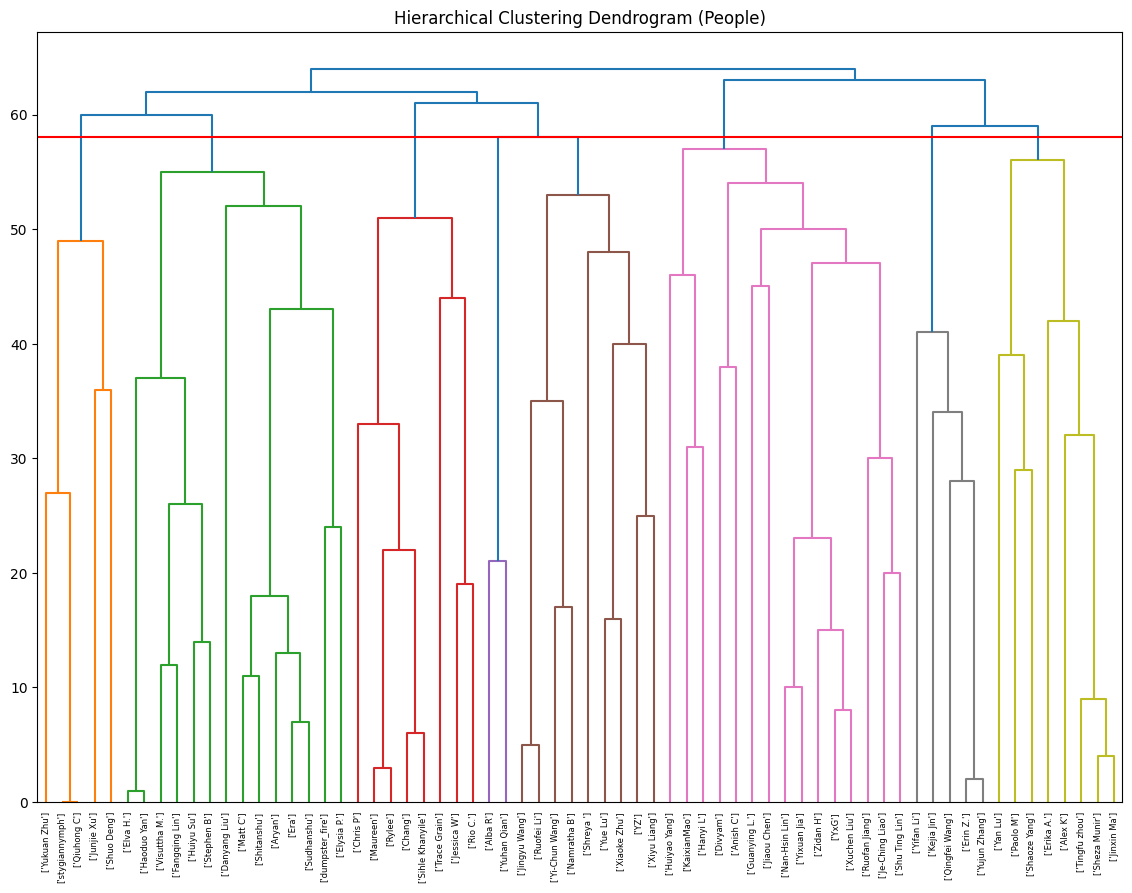

In [ ]:
# Authors: Mathew Kallada & Chris Teplovs
# License: BSD 3 clause
"""
=========================================
Plot Hierarachical Clustering Dendrogram
=========================================
This example plots the corresponding dendrogram of a hierarchical clustering
using AgglomerativeClustering and the dendrogram method available in scipy.
"""

import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.named_steps.cluster.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)


    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

    threshold = kwargs.pop('color_threshold',None)
    if threshold is not None:
        plt.axhline(threshold,color='red')


plt.figure(figsize=(14,10))
plt.title('Hierarchical Clustering Dendrogram (People)')

plot_dendrogram(pipe,labels=y.values, color_threshold=58) # Colors across red line)

plt.xticks(rotation=90)
plt.savefig('music_clusters.pdf')
plt.show()


In [ ]:
music.shape

## Task

Conduct a k-means clustering of the music data.  Preprocess the data by scaling it and performing a PCA and retaining 2 dimensions.  Use the PCA scores as input to the clustering. Use silhouette plots to determine the optimal number of clusters.  If time permits, experiment with changing the number of principal components.  Be sure to set your random_state to allow you to reproduce your results.

Note that you do not need to use a pipeline, although doing so may make your life easier.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

pipe = Pipeline([
    ('impute',SimpleImputer(strategy='constant',fill_value=1)),
    ('scale',StandardScaler()),
    ('pca', PCA(n_components=2,random_state=42)),
    ('cluster', KMeans(n_clusters=3) ),
])

In [ ]:
kc = pipe.fit_predict(X)

In [ ]:
kc

In [ ]:
pd.concat([music.drop('Name',axis=1), pd.DataFrame(kc,columns=['kmeanscluster'])], axis=1).groupby('kmeanscluster').mean()

In [ ]:
Xv = X.values # make things clearer below

In [ ]:
Xv

In [ ]:
pipe0 = Pipeline([
    ('fillna',SimpleImputer(strategy='constant',fill_value=1)),
    ('scale',StandardScaler()),
    ('pca', PCA(n_components=2,random_state=42)),
])

In [ ]:
pipe1 = Pipeline([
    ('preprocessing',pipe0),
    ('kmeans', KMeans(n_clusters=2,init='k-means++',random_state=42)),
])

In [ ]:
Xvalues = X.values

In [ ]:
Xformed = pipe0.fit_transform(Xvalues)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm # colormaps
import numpy as np


range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
label_points = False
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(Xformed) + (n_clusters + 1) * 10])

    pipe1.named_steps.kmeans.set_params(n_clusters=n_clusters,random_state=42)
    clusterer = pipe1.named_steps.kmeans
    cluster_labels = pipe1.fit_predict(X)
    cluster_labels = KMeans(n_clusters=n_clusters, random_state=42).fit_predict(Xformed)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(Xformed, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Xformed, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(Xformed[:, 0], Xformed[:, 1], marker='o', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    if label_points:
        for i,v in enumerate(Xformed):
            ax2.text(v[0],v[1],y.iloc[i][0],alpha=0.4)


    # Labeling the clusters
    centers = clusterer.cluster_centers_
    #print(centers)
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.savefig('silhouette%02d.pdf' % n_clusters)
plt.show()

### Task: Explain the silhouette plots above.
What do the above plots tell you?  What do you think is the "best" number of clusters?

Higher = better. Ideal is 1.

high score = good separation of clusters. Clusters are well defined, and objects in each cluster are definitely supposed to be there.

A score of 0 indicates that the object is on or very close to the decision boundary between two neighboring clusters. ie, clusters are not clearly defined, and objects may be incorrectly categorized. (This section completed with ChatGPT).

Shows clustering closeness to a central point.

For homework:
- Download kaggle dataset
-

# Please remember to submit your notebook in IPYNB and HTML format.

In [ ]:
# Ignore, these are my personal instructions for html conversion.
# Format as: !jupyter nbconvert /content/mynotebook.ipynb --to html
# To use, download and re-upload  ipnyb to make it a file on Colab
# Then, uncomment and run the cell below. Download and submit the HTML.
# !jupyter nbconvert '/content/SI_618_Day_10_Clustering_Inclass (1).ipynb' --to html